# Load the data

In [1]:
# Import necessary packages
using DrWatson
using JLD2

# Activate the project environment
@quickactivate :FlowComplexity

# Define the file path
file_path = joinpath("./data", "data.jld2")

# Load the data from the specified file
@load file_path sim_array

1-element Vector{Symbol}:
 :sim_array

# Compute population statistics

In [2]:
using DataFrames, Statistics

# Get the length of the array
nsim = length(sim_array)

# Get the first simulation of the array
first_sim = sim_array[1]

# Define the array that will hold our population time series
max_t = Int(first_sim.total_time)
nspecies = 10
pop_array = zeros(Int, nsim, max_t, nspecies)

# Populate the population array
for i in 1:nsim
    sim = sim_array[i]
    time_series_df = FlowComplexity.convert_timeseries_to_tidy_df(sim.time_evolution)
    
    for j in 1:max_t
        for k in 1:nspecies
            filtered_time_series_df = filter(row -> row[:time] == j && row[:variable] == string(k), time_series_df)
            pop_array[i, j, k] = filtered_time_series_df[1, :value]
        end
    end
end

# Calculate the averages
pop_avg_array = dropdims(mean(pop_array, dims=1), dims=1)

# Calculate the standard deviations
pop_std_array = dropdims(std(pop_array, dims=1), dims=1)

10×10 Matrix{Float64}:
 0.0  17.1856  10.875    11.8958   …  4.26354  5.03764  4.16867  3.28126
 0.0  11.3925  18.0911    9.18695     5.66569  5.08156  4.07704  3.43188
 0.0  14.4776  11.928     5.45283     4.09471  6.04152  3.88873  4.42719
 0.0  12.0743  12.0481   10.9118      5.80804  4.43346  5.94886  3.19896
 0.0  16.4033   9.62404   8.05605     5.00666  7.21495  4.13656  4.14193
 0.0  17.4181   9.07316  12.363    …  4.81202  2.62467  3.09839  2.57337
 0.0  15.4704  10.3199    5.9339      5.55878  6.2361   5.75036  3.94405
 0.0  16.2989   7.7057   10.2356      5.54176  5.30094  4.19656  4.54117
 0.0  12.3581  11.5643    7.52846     7.52773  3.82971  4.52278  4.16467
 0.0  11.9703  16.1758    7.77174     5.94886  4.78888  5.40062  2.36643

# Plot the figure

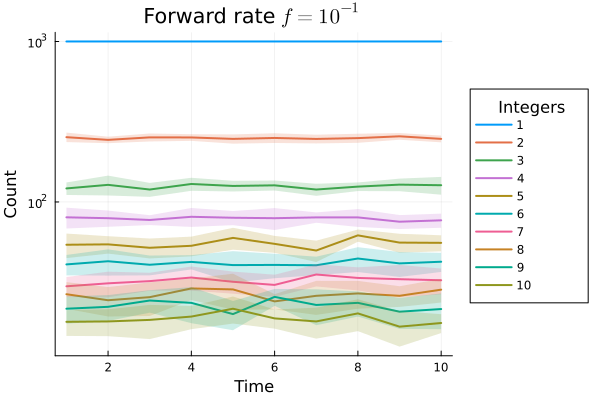

"/Users/alexandre/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/milestones/01_time-series/f=0.1/figs/pop_f=1e-1.pdf"

In [3]:
using Plots
using LaTeXStrings
using FileIO

# Create plot with basic settings
p = plot(
    title="Forward rate " * L"f=10^{-1}",
    xlabel="Time",
    ylabel="Count",
    yaxis=:log10,
    legendtitle="Integers",
    legend=:outerright
)

# Plot data for each species
for i in 1:nspecies
    plot!(
        p,
        1:max_t,
        pop_avg_array[:, i],
        lw=2,
        ribbon=pop_std_array[:, i],
        fillalpha=0.2,
        label="$i"
    )
end

# Add annotation
annotate!(75, 700, text("Shading represents STD", :black, 10))

# Display and save plot
display(p)
mkpath("figs")
savefig("figs/pop_f=1e-1.pdf")